# K-Nearest Neighbours Implementation
- It is a non parametric algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('seaborn')

In [3]:
dfx=pd.read_csv('../Csv Files/xdata.csv')
dfy=pd.read_csv('../Csv Files/ydata.csv')
X=dfx.values
Y=dfy.values
print(X.shape)
print(Y.shape)
print(X)

(399, 3)
(399, 2)
[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]


In [4]:
X=X[:,1:]
Y=Y[:,1:].reshape((-1,))
print(X.shape)
print(Y.shape)

(399, 2)
(399,)


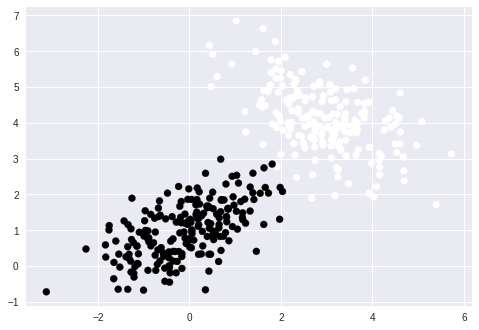

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

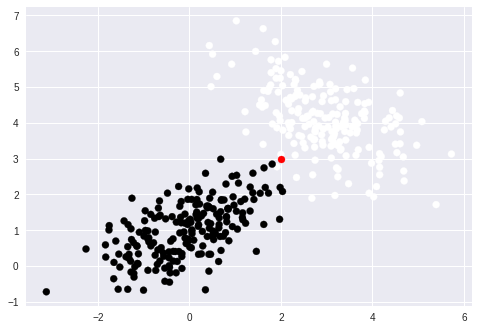

In [7]:
query_x=np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [8]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    #First k points (Nearest)
    vals=vals[:k]
    vals=np.array(vals)
    print(vals)

In [9]:
knn(X,Y,query_x)

[[0.11937695 0.        ]
 [0.24392799 1.        ]
 [0.24435617 0.        ]
 [0.32750158 0.        ]
 [0.44941874 1.        ]]


In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    #First k points (Nearest)
    vals=vals[:k]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    return new_vals

In [11]:
x=knn(X,Y,query_x)

(array([0., 1.]), array([3, 2]))


In [12]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    #First k points (Nearest)
    vals=vals[:k]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [13]:
x=knn(X,Y,query_x)
print(x)

(array([0., 1.]), array([3, 2]))
0.0


In [14]:
x=knn(X,Y,[4,5])
print(x)

(array([0.]), array([5]))
0.0


In [15]:
x=knn(X,Y,[0,0])
print(x)

(array([1.]), array([5]))
1.0


# Project : Recognizing MNIST Handwritten Digits using KNN

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 1. Data Preparation

In [6]:
df=pd.read_csv('../Csv Files/train.csv')
print(df.shape)

(42000, 785)


In [18]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [19]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [21]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [23]:
split=int(0.8*X.shape[0])
print(split)
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


4


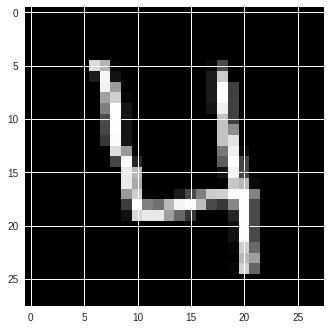

In [25]:
# Visualize some samples
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
print(Y_train[3])
drawImg(X_train[3])

### Step 2. K-NN

In [29]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    #First k points (Nearest)
    vals=vals[:k]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

### Step 3. Make Prediction

In [37]:
# Training time is O(1)
# Test time is O(NQ)
# N=no of samples in training data
# Q=no of samples in testing data
pred=knn(X_train,Y_train,X_test[2])
print(int(pred))

7


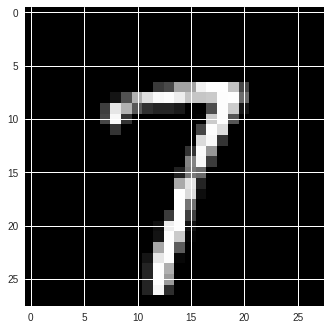

7


In [38]:
drawImg(X_test[2])
print(Y_test[2])

In [39]:
# Write a method which computes accuracy of KNN over the test set